In [66]:
import pywt
import numpy as np
import matplotlib.pyplot as plt 
from skimage.io import imread
from skimage.util import random_noise
from skimage.restoration import denoise_tv_chambolle,denoise_nl_means
from scipy.ndimage import median_filter,gaussian_filter
from skimage.metrics import peak_signal_noise_ratio,mean_squared_error,structural_similarity as SSIM

image = imread(r"C:\Users\lenovo\Documents\medical-image.jpg", as_gray=True)
# Add noise to the image
noise_std = 0.1
noisy_image = image + noise_std * np.random.randn(*image.shape)

# Perform wavelet decomposition
coeffs = pywt.wavedec2(noisy_image, 'db4')

# Set a threshold value 
threshold = 2 * noise_std

# Apply thresholding to the wavelet coefficients
thresholded_coeffs = []
for i in range(len(coeffs)):
    if i == 0:
        thresholded_coeffs.append(coeffs[0])
    else:
        thresholded_coeffs.append((pywt.threshold(coeffs[i][0], threshold, mode='soft'),
                                   pywt.threshold(coeffs[i][1], threshold, mode='soft'),
                                   pywt.threshold(coeffs[i][2], threshold, mode='soft')))

# Reconstruct the denoised image from the thresholded coefficients
denoised_image = pywt.waverec2(thresholded_coeffs, 'db4')

# Apply other denoising algorithms for comparison
denoised_tv = denoise_tv_chambolle(noisy_image, weight=1.0)
denoised_img_nlmeans = denoise_nl_means(noisy_image, h=0.1, sigma=1.5, fast_mode=True)
denoised_img_median = median_filter(noisy_image, size=3)
denoised_img_gaussian = gaussian_filter(noisy_image, sigma=0.5)

# Calculate SSIM
SSIM_wavelet = SSIM(image, denoised_image, data_range=255)
SSIM_tv=SSIM(image,denoised_tv,data_range=255)
SSIM_nlmeans=SSIM(image,denoised_img_nlmeans,data_range=255)
SSIM_median=SSIM(image,denoised_img_median,data_range=255)
SSIM_gaussian=SSIM(image,denoised_img_gaussian,data_range=255)

# Compute MSE values for all denoised images 
mse_wavelet = mean_squared_error(image, denoised_image)
mse_tv = mean_squared_error(image, denoised_tv)
mse_nlmeans = mean_squared_error(image, denoised_img_nlmeans)
mse_median = mean_squared_error(image, denoised_img_median)
mse_gaussian = mean_squared_error(image, denoised_img_gaussian)

# Compute PSNR values for all denoised images
psnr_wavelet = peak_signal_noise_ratio(image, denoised_image)
psnr_tv = peak_signal_noise_ratio(image, denoised_tv)
psnr_nlmeans = peak_signal_noise_ratio(image, denoised_img_nlmeans)
psnr_median = peak_signal_noise_ratio(image, denoised_img_median)
psnr_gaussian = peak_signal_noise_ratio(image, denoised_img_gaussian)
print("Wavelet Thresholding: \n PSNR=", psnr_wavelet,"\t MSE=",mse_wavelet,"\t SSIM=",SSIM_wavelet)
print("Total Variation: \n PSNR=", psnr_tv,"\t MSE=",mse_tv,"\t SSIM=",SSIM_tv)
print("Non-local Means: \n PSNR=", psnr_nlmeans,"\t MSE=",mse_nlmeans,"\t SSIM=",SSIM_nlmeans)
print("Median Filter: \n PSNR=", psnr_median,"\t MSE=",mse_median,"\t SSIM=",SSIM_median)
print("Gaussian Filter: \n PSNR=", psnr_gaussian,"\t MSE=",mse_gaussian,"\t SSIM=",SSIM_gaussian)


Wavelet Thresholding: 
 PSNR= 28.101097322029066 	 MSE= 0.001548425332360842 	 SSIM= 0.9999297124963825
Total Variation: 
 PSNR= 23.279010042441193 	 MSE= 0.004700012313676537 	 SSIM= 0.9996992358487958
Non-local Means: 
 PSNR= 20.059997809474545 	 MSE= 0.009862799830980111 	 SSIM= 0.9991850269144288
Median Filter: 
 PSNR= 27.107181475653967 	 MSE= 0.0019466230091024746 	 SSIM= 0.9999386208183283
Gaussian Filter: 
 PSNR= 23.811852908383898 	 MSE= 0.004157332009445726 	 SSIM= 0.999903108133296


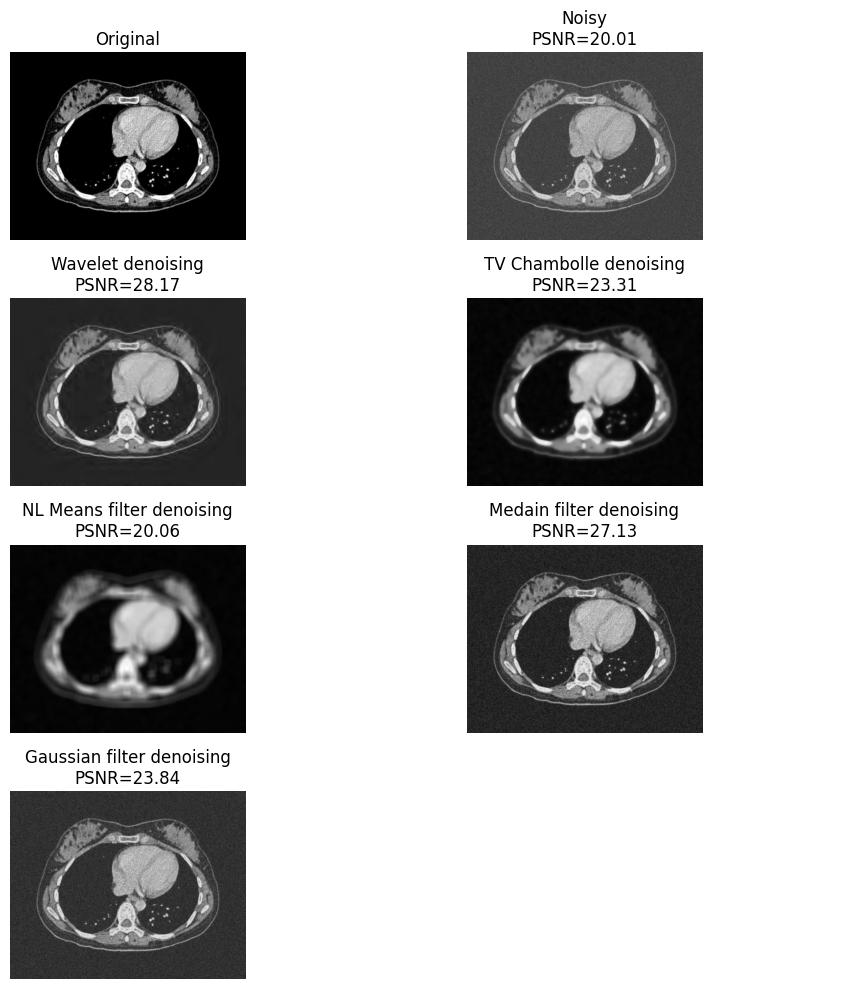

In [17]:
# Plot the original, noisy, and denoised images
fig, axes = plt.subplots(nrows=4, ncols=2, figsize=(10, 10))
ax = axes.ravel()

ax[0].imshow(image, cmap='gray')
ax[0].set_title("Original")

ax[1].imshow(noisy_image, cmap='gray')
ax[1].set_title("Noisy\nPSNR={:.2f}".format(peak_signal_noise_ratio(image, noisy_image)))

ax[2].imshow(denoised_image, cmap='gray')
ax[2].set_title("Wavelet denoising\nPSNR={:.2f}".format(psnr_wavelet))

ax[3].imshow(denoised_tv, cmap='gray')
ax[3].set_title("TV Chambolle denoising\nPSNR={:.2f}".format(psnr_tv))

ax[4].imshow(denoised_img_nlmeans, cmap='gray')
ax[4].set_title("NL Means filter denoising\nPSNR={:.2f}".format(psnr_nlmeans))


ax[5].imshow(denoised_img_median, cmap='gray')
ax[5].set_title("Medain filter denoising\nPSNR={:.2f}".format(psnr_median))


ax[6].imshow(denoised_img_gaussian, cmap='gray')
ax[6].set_title("Gaussian filter denoising\nPSNR={:.2f}".format(psnr_gaussian))


for a in ax:
    a.axis('off')

plt.tight_layout()
plt.show()

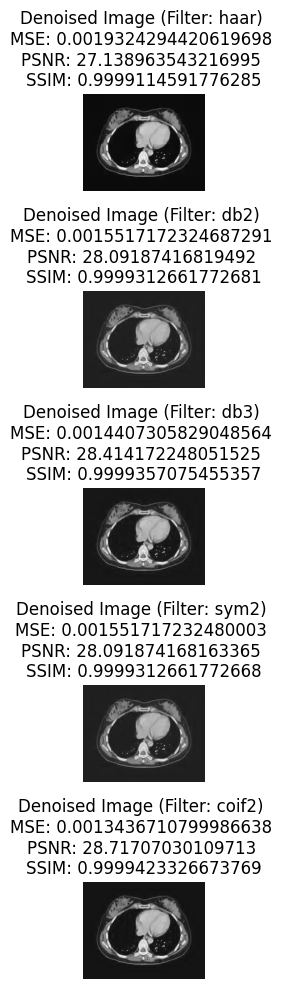

In [69]:
wavelet_filters = ['haar', 'db2', 'db3','sym2','coif2']  # Example wavelet filters
denoised_images = []
mse=[]
psnr=[]
ssim=[]

for wavelet_filter in wavelet_filters:
    coeffs = pywt.wavedec2(image, wavelet_filter)
    threshold = 2 * noise_std
    thresholded_coeffs = []
    for i in range(len(coeffs)):
        if i == 0:
            thresholded_coeffs.append(coeffs[0])
        else:
            thresholded_coeffs.append((pywt.threshold(coeffs[i][0], threshold, mode='soft'),
                                   pywt.threshold(coeffs[i][1], threshold, mode='soft'),
                                   pywt.threshold(coeffs[i][2], threshold, mode='soft')))
    denoised_image = pywt.waverec2(thresholded_coeffs, wavelet_filter)
    denoised_images.append(denoised_image)

num_filters = len(wavelet_filters)
plt.figure(figsize=(10, 10))

for i in range(num_filters):
    mse.append(mean_squared_error(image, denoised_images[i]));
    psnr.append(peak_signal_noise_ratio(image, denoised_images[i]))
    ssim.append(SSIM(image, denoised_images[i],data_range=255))

for i in range(num_filters):
    plt.subplot(num_filters, 2, 2 * i + 1)
    plt.imshow(denoised_images[i], cmap='gray')
    plt.title(f'Denoised Image (Filter: {wavelet_filters[i]}) \nMSE: {mse[i]} \nPSNR: {psnr[i]} \nSSIM: {ssim[i]}')
    plt.axis('off')
 
plt.tight_layout()
plt.show()